# Проект "Как изменилась тематика фильмов за последние 20 лет"    
## Определение тематики фильмов и визуализация

In [5]:
import pandas as pd
descriptions_1 = pd.read_excel('Descriptions_1.xlsx', index_col=0)
descriptions_2 = pd.read_excel('Descriptions_2.xlsx', index_col=0)
descriptions_1.head(), descriptions_2.head()

(                                     Описание фильма
 0  Грузовики лос-анджелесской инкассаторской комп...
 1  Гриша, бывший мажор, побывавший холопом и став...
 2  Если ты идешь на рыбалку — будь готов к тому, ...
 3  Афганистан, март 2018 года. Во время спецопера...
 4  История о путешествии взрослого героя к своему...,
                                      Описание фильма
 0  Участвуя в программе на телевидении, Данила Ба...
 1  Жизнь десятилетнего Гарри Поттера нельзя назва...
 2  Жизнь харизматичного авантюриста, капитана Дже...
 3  Фрэнк Эбегнейл успел поработать врачом, адвока...
 4  Римская империя. Бесстрашного и благородного г...)

## Начнём работу с нормализации текста

In [3]:
from nltk.corpus import stopwords 
from pymystem3 import Mystem
mystem = Mystem()

In [5]:
stops = set(stopwords.words('russian') + ['это', 'весь', 'некоторый', 'который', 'свой', 'поэтому'])

def normalize(text):
    normalized_list =[token for token in mystem.lemmatize(text.lower()) if len(token) > 2 and token not in stops]
    normalized_text = ' '.join(normalized_list)
    return normalized_text


In [7]:
descriptions_1['Нормализованное описание'] = descriptions_1['Описание фильма'].apply(normalize)
descriptions_1.head()

,Описание фильма,Нормализованное описание
0,Грузовики лос-анджелесской инкассаторской комп...,грузовик лос-анджелесский инкассаторский компа...
1,"Гриша, бывший мажор, побывавший холопом и став...",гриша бывший мажор побывать холоп становиться ...
2,"Если ты идешь на рыбалку — будь готов к тому, ...",идти рыбалка — готовый вытягивать рыба мечта...
3,"Афганистан, март 2018 года. Во время спецопера...",афганистан март 2018 год время спецоперация по...
4,История о путешествии взрослого героя к своему...,история путешествие взрослый герой батя суровы...


In [8]:
descriptions_2['Нормализованное описание'] = descriptions_2['Описание фильма'].apply(normalize)
descriptions_2.head()

,Описание фильма,Нормализованное описание
0,"Участвуя в программе на телевидении, Данила Ба...",участвовать программа телевидение данила багро...
1,Жизнь десятилетнего Гарри Поттера нельзя назва...,жизнь десятилетний гарри поттер называть сладк...
2,"Жизнь харизматичного авантюриста, капитана Дже...",жизнь харизматичный авантюрист капитан джек во...
3,"Фрэнк Эбегнейл успел поработать врачом, адвока...",фрэнк эбегнейл успевать поработать врач адвока...
4,Римская империя. Бесстрашного и благородного г...,римский империя бесстрашный благородный генера...


In [11]:
# так как функция нормализации выполняется долго, сохраним полученные данные в excel-файлы для дальнейшей работы:
descriptions_1.to_excel('Normalized description_1.xlsx')
descriptions_2.to_excel('Normalized description_2.xlsx')

In [263]:
# эта ячейка понадобится при перезагрузке ядра, чтобы не запускать код с самого начала:
import pandas as pd
descriptions_1 = pd.read_excel('Normalized description_1.xlsx', index_col=0)
descriptions_2 = pd.read_excel('Normalized description_2.xlsx', index_col=0)
descriptions_1.head(), descriptions_2.head()

(                                     Описание фильма  \
 0  Грузовики лос-анджелесской инкассаторской комп...   
 1  Гриша, бывший мажор, побывавший холопом и став...   
 2  Если ты идешь на рыбалку — будь готов к тому, ...   
 3  Афганистан, март 2018 года. Во время спецопера...   
 4  История о путешествии взрослого героя к своему...   
 
                             Нормализованное описание  
 0  грузовик лос-анджелесский инкассаторский компа...  
 1  гриша бывший мажор побывать холоп становиться ...  
 2  идти рыбалка  —  готовый вытягивать рыба мечта...  
 3  афганистан март 2018 год время спецоперация по...  
 4  история путешествие взрослый герой батя суровы...  ,
                                      Описание фильма  \
 0  Участвуя в программе на телевидении, Данила Ба...   
 1  Жизнь десятилетнего Гарри Поттера нельзя назва...   
 2  Жизнь харизматичного авантюриста, капитана Дже...   
 3  Фрэнк Эбегнейл успел поработать врачом, адвока...   
 4  Римская империя. Бесстрашного 

## Определим тематику текстов с помощью TF-IDF

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+-?\w+?\b')  # подредактируем паттерн, чтобы слова не разбивались по дефису

In [245]:
def create_keywords_df(descriptions):
    tfidf_matrix = vectorizer.fit_transform(descriptions)    
    terms = vectorizer.get_feature_names_out()
    sums = tfidf_matrix.sum(axis=0)  # посчитаем суммарное значение TF-IDF по каждому токену
    
    data = [] # посмотреть, как выглядит data
    for col, term in enumerate(terms):
        data.append( (term, sums[0, col]) )
    
    ranking = pd.DataFrame(data, columns=['Ключевое слово', 'Суммарный tf-idf'])
    keys = ranking.sort_values('Суммарный tf-idf', ascending=False).reset_index(drop=True)

    return(keys)

In [264]:
keys_1_df = create_keywords_df(descriptions_1['Нормализованное описание'])
keys_2_df = create_keywords_df(descriptions_2['Нормализованное описание'])
keys_1_df.head(), keys_2_df.head()

(  Ключевое слово  Суммарный tf-idf
 0          жизнь        221.252387
 1           друг        180.912478
 2            год        172.063116
 3        человек        157.456449
 4        история        157.311240,
   Ключевое слово  Суммарный tf-idf
 0          жизнь        231.967041
 1           друг        204.529232
 2            год        176.069397
 3        человек        172.243636
 4          фильм        168.223400)

In [29]:
# удалим из получившегося датафрейма оставшиеся стоп-слова:
# (этот список расширялся по ходу дальнейшей работы)
new_stops = ['год', 'оказываться', 'самый', 'мочь', 'однажды', 'фильм', 'что', 'то', 'однако', 'вскоре', 'приходиться',
    'происходить', 'становиться', 'каждый', 'из', 'за', 'пока', 'история', 'режиссер', 'актер', 'хотеть', 'оставаться',
    'кажется', 'снова', 'никто', 'ничто', 'никак', 'делать', 'нужно', 'сделать', 'иметь', 'ради', 'очень', 'некий', 'вместо',
    'сразу', 'бывать', 'весьма', 'менее', 'нибудь', 'никакой', 'немного','прежде', 'сей', 'туда', 'одновременно',
    'кто', 'чей', 'среди', 'лишь', 'кроме', 'либо', 'сериал', 'нечто', 'сказать', 'разворачиваться', 'наступать', 'кое-что',
    'что-то', 'из-за', 'когда-нибудь', 'когда-то', 'что-либо', 'какой-то', 'кто-то', 'любой', 'по']

In [33]:
# отфильтруем ключевые слова по условию (маске), что они не входят в список new_stops:
def drop_new_stops(keys):
    keys = keys[~keys['Ключевое слово'].isin(new_stops)].reset_index(drop=True)
    return(keys)

In [265]:
keys_1_df = drop_new_stops(keys_1_df)
keys_2_df = drop_new_stops(keys_2_df)

In [266]:
# создадим общий df для наглядного сравнения ключевых слов по двум периодам:
keys_df = pd.merge(keys_1_df, keys_2_df, right_index = True, left_index = True, how='outer')
keys_df.columns = ["Ключевые слова '20", "Суммарный tf-idf", "Ключевые слова '00",  "Суммарный tf-idf"]
keys_df[:30]

,Ключевые слова '20,Суммарный tf-idf,Ключевые слова '00,Суммарный tf-idf
0,жизнь,221.252387,жизнь,231.967041
1,друг,180.912478,друг,204.529232
2,человек,157.456449,человек,172.243636
3,девушка,155.740771,время,135.497503
4,время,130.160504,девушка,134.766617
5,решать,129.751553,молодой,134.617111
6,дом,122.485245,решать,119.450178
7,семья,121.134103,женщина,115.270211
8,новый,121.044304,новый,113.011274
9,молодой,118.755046,мир,112.326134


In [271]:
# как видно из таблицы, многие ключевые слова идентичны в обоих периодах.
# объединим общие для этих периодов ключевые слова в множество:
keys_set_1 = set(keys_1_df['Ключевое слово'][:1000])
keys_set_2 = set(keys_2_df['Ключевое слово'][:1000])
common_keys_set = keys_set_1 & keys_set_2
len(common_keys_set)

832

In [273]:
specific_keys_set_1 = keys_set_1 - keys_set_2
specific_keys_set_2 = keys_set_2 - keys_set_1
len(specific_keys_set_1)

168

In [43]:
# уберём имена из списка уникальных ключей c помощью pymorphy:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

In [45]:
names = []
def drop_names(words_set):
    for word in words_set:
        if 'Name' in morph.parse(word)[0].tag:
            names.append(word)
             
    no_names_words_set = words_set - set(names)
    return(no_names_words_set)

In [47]:
specific_topics_list_1 = list(drop_names(specific_keys_set_1))
specific_topics_list_2 = list(drop_names(specific_keys_set_2))
specific_topics_list_1[:10], specific_topics_list_2[:10]

(['связанный',
  'пассажир',
  'повар',
  'налаживать',
  'культура',
  'оборачиваться',
  'футбольный',
  'лесной',
  'вина',
  'артист'],
 ['клиника',
  'красавица',
  'персонаж',
  'дама',
  'основа',
  'бедный',
  'одержимый',
  'покой',
  'напарник',
  'различный'])

In [206]:
# почистим множество общих ключевых слов от имён с помощью этой же функции:
common_topics_list = list(drop_names(common_keys_set))
common_topics_list[:20]

['давать',
 'успех',
 'легенда',
 'выяснять',
 'идти',
 'грабитель',
 'документальный',
 'далеко',
 'процесс',
 'первый',
 'разрушать',
 'зарабатывать',
 'партнер',
 'непростой',
 'придумывать',
 'позволять',
 'выступление',
 'детский',
 'ученик',
 'покидать']

In [51]:
# а теперь возьмём датафреймы с ключевыми словами и оставимв них только специфичные, чтобы увидеть отсортированный список:
def filter_specific_topics(all_keys, specific_topics):
    specific_topics_df = all_keys[all_keys['Ключевое слово'].isin(specific_topics)].reset_index(drop=True)
    return(specific_topics_df)

In [55]:
specific_topics_df_1 = filter_specific_topics(keys_1_df,specific_topics_list_1)
specific_topics_df_1

,Ключевое слово,Суммарный tf-idf
0,рождественский,18.727118
1,противостоять,17.687133
2,социальный,17.527255
3,объединяться,17.187635
4,общаться,17.090481
...,...,...
153,грозить,10.074690
154,интерес,10.053731
155,смертельно,10.053608
156,московский,10.046649


In [57]:
specific_topics_df_2 = filter_specific_topics(keys_2_df, specific_topics_list_2)
specific_topics_df_2[:10]

,Ключевое слово,Суммарный tf-idf
0,гей,27.017573
1,красавица,26.207558
2,любовный,24.094288
3,мафия,23.192396
4,подружка,21.029437
5,доллар,19.670419
6,террорист,18.931042
7,основывать,17.825642
8,любовница,17.346851
9,существовать,17.154701


In [59]:
common_topics_df = filter_specific_topics(keys_2_df, common_topics_list)
common_topics_df[:10]

,Ключевое слово,Суммарный tf-idf
0,жизнь,231.564939
1,друг,204.208156
2,человек,171.965662
3,время,135.294352
4,девушка,134.553030
5,молодой,134.419138
6,решать,119.301053
7,женщина,115.116162
8,новый,112.841161
9,мир,112.149024


In [208]:
# создадим общий df для наглядного сравнения специфичных и общих ключевых слов по двум периодам:
keys_df = pd.merge(common_topics_df, specific_topics_df_1,  right_index = True, left_index = True, how='outer')
keys_df = pd.merge(keys_df, specific_topics_df_2,  right_index = True, left_index = True, how='outer')
keys_df.columns = ["Общие ключевые слова", "Суммарный tf-idf", "Ключевые слова '20", "Суммарный tf-idf",
                        "Ключевые слова '00",  "Суммарный tf-idf"]
keys_df.to_excel('Common & specific keywords.xlsx')
keys_df[:15]

,Общие ключевые слова,Суммарный tf-idf,Ключевые слова '20,Суммарный tf-idf,Ключевые слова '00,Суммарный tf-idf
0,жизнь,231.564939,рождественский,18.727118,гей,27.017573
1,друг,204.208156,противостоять,17.687133,красавица,26.207558
2,человек,171.965662,социальный,17.527255,любовный,24.094288
3,время,135.294352,объединяться,17.187635,мафия,23.192396
4,девушка,134.553030,общаться,17.090481,подружка,21.029437
5,молодой,134.419138,волшебный,16.948311,доллар,19.670419
6,решать,119.301053,загородный,16.100565,террорист,18.931042
7,женщина,115.116162,развод,15.965807,основывать,17.825642
8,новый,112.841161,супруг,15.834695,любовница,17.346851
9,мир,112.149024,ферма,15.684000,существовать,17.154701


## Теперь создадим облако слов по нормализованным описаниям

In [107]:
# определим функцию, которая подчистит описания и сохранит их в строку (для отрисовки облака слов нужна строка):
stuff = new_stops + common_topics_list
def cleanup_descriptions(descriptions_df):
    normalized_descriptions_text = ' '.join(descriptions_df['Нормализованное описание'].tolist())
    # поскольку в ключевых словах часто встречаются имена, мы их исключим:
    clean_descriptions = [token for token in normalized_descriptions_text.split() if token not in stuff and 'Name' not in morph.parse(token)[0].tag]
    clean_descriptions = ' '.join(clean_descriptions)
    return(clean_descriptions)

In [69]:
clean_descriptions_1 = cleanup_descriptions(descriptions_1)
clean_descriptions_1[:1000]

'грузовик лос-анджелесский инкассаторский fortico security подвергаться охранник крепкий немногословный британец эйч впритык необходимый минимум пройти тест фитнес стрельба вождение грузовик ограбить вооруженный налетчик эйч расправляться уважение интересовать мажор побывать холоп чутко реагировать несправедливость мимо беспредел творить наглый избалованный мажорка рыбалка — вытягивать рыба волшебный щука твой спускать ветер третий приберегать царский действовать волшебный щука шкурка представать скатерть самобранка кот царство кощей — афганистан март 2018 спецоперация талиб сержант кинль засада ранение переводчик сотрудничать американец очнуться кинль протаскивать вина покой афганистан усиленно талиб батя суровый мужик заря девяностый падение скала ранее увлекаться экстремальный развлечение впадать депрессия регулярно заливать горе алкоголь хантер почтить забираться телерадиомачта b67 развеивать прах сооружение соединять верхушка суперагент британский разведка орсон форчун наслаждатьс

In [70]:
clean_descriptions_2 = cleanup_descriptions(descriptions_2)
clean_descriptions_2[:1000]

'участвовать телевидение багров чечня неприятность хоккеист вылетать десятилетний поттер сладкий едва исполняться дядя тетя сирота воспитание доставаться тычок подзатыльник одиннадцатый порог - волшебник зачислять магия название хогвартс мчаться хогвартс экспресс навстречу главное — ключ разгадка харизматичный авантюрист воробей увлекательный резко заклятый барбосс жемчужина нападать порт ройал красть губернатор возглавлять спасательный экспедиция быстрый британия вызволять заодно отбирать злодей жемчужина вслед парочка амбициозный коммодор норрингтон числиться барбосса висеть вечный проклятие лунный скелет проклятие золото ацтек возвращать пират эбегнейл поработать пилот пассажирский авиалиния – достижение совершеннолетие мастер обман жульничество подделка документ конечный счет доллар фальшивый чек фбр хэнрэтти отдавать схватывать ответственность деяние опережать погоня римский империя бесстрашный благородный генерал максимус боготворить император безгранично доверять относиться воин

In [75]:
# сохраним текстовое описание:
with open('clean_descriptions_1(WC).txt', 'w', encoding='utf-8') as file:
    file.write(clean_descriptions_1)
with open('clean_descriptions_2(WC).txt', 'w', encoding='utf-8') as file:
    file.write(clean_descriptions_2)

In [ ]:
# здесь можно загрузить текст:
# with open('clean_descriptions_1(WC).txt') as file:
    # file.read()
# with open('clean_descriptions_2(WC).txt') as file:
    # file.read()

In [279]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [280]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=21, max_font_size=96, min_font_size=11,
                          colormap='PuBu').generate(text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    return(plt.savefig(input('Как назвать файл облака?')), plt.show())

Как назвать файл облака? 2020's WC


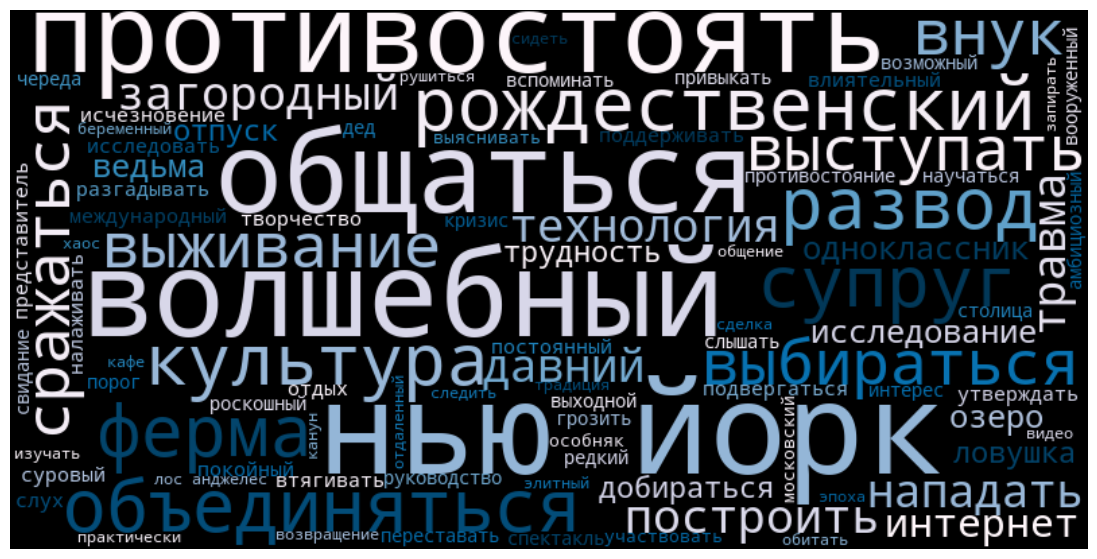

(None, None)

In [281]:
create_wordcloud(clean_descriptions_1)

Как назвать файл облака? 2000's WC.jpg


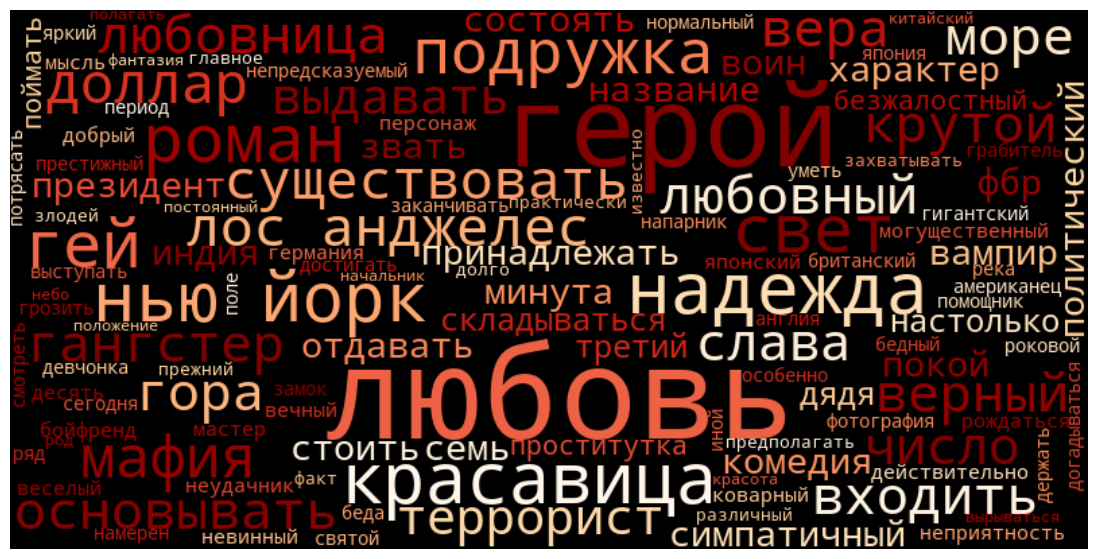

(None, None)

In [346]:
create_wordcloud(clean_descriptions_2)

## Теперь посмотрим на тематику фильмов, отобрав из текстов только существительные

In [91]:
# создадим функцию, которая отберёт из текстов только существительные:
def filter_nouns(text):
    nouns = ' '.join([token for token in text.split() if morph.parse(token)[0].tag.POS == 'NOUN'])
    return nouns

In [93]:
# за двадцатые годы получим:
nouns_from_descriptions_1 = filter_nouns(clean_descriptions_1)
nouns_from_descriptions_1[:1000]

'грузовик охранник британец эйч минимум тест фитнес стрельба вождение грузовик налетчик эйч уважение мажор холоп несправедливость беспредел мажорка рыбалка рыба щука ветер щука шкурка скатерть самобранка кот царство кощей афганистан март спецоперация талиб сержант кинль засада ранение переводчик американец кинль вина покой афганистан талиб батя мужик заря падение скала развлечение депрессия горе алкоголь телерадиомачта прах сооружение верхушка суперагент разведка орсон форчун отпуск услуга лаборатория оперативник орсон посредник сделка продажа миллиардер поклонник знаменитость симмондс прикрытие пригород разведение пчела соседка миссис паркер сарай миссис паркер кибермошенник счет удар счеты навык наследник вселенная арракис песок солнце чудовище ресурс меланж захват арракис мажор домик серпантин эко гостиница погром мажор квартал винодельня фитнес телевидение передача отчаяние препарат создатель преображение соблюдение красотка шоу-бизнес майор гром санкт-петербург характер позиция ма

In [94]:
nouns_from_descriptions_2 = filter_nouns(clean_descriptions_2)
nouns_from_descriptions_2[:1000]

'телевидение чечня неприятность хоккеист поттер дядя тетя сирота воспитание тычок подзатыльник порог волшебник магия название хогвартс хогвартс экспресс главное ключ разгадка авантюрист воробей барбосс жемчужина порт губернатор экспедиция британия злодей жемчужина парочка коммодор норрингтон барбосса проклятие скелет проклятие золото ацтек пират эбегнейл пилот авиалиния достижение совершеннолетие мастер обман жульничество подделка документ счет доллар чек фбр хэнрэтти ответственность деяние погоня империя генерал максимус император воин противник придворный интрига коммод преемник максимус соперник верность коммод приказ максимус максимус плен работорговец организатор полководец гладиатор курс чародейство волшебство хогвартс узник азкабан пребывание сказание средиземье хроника кольцо кольцо хоббит волшебник разговор кольцо кольцо властитель средиземье саурон обладатель саурон средиземье кольцо племянник поттер курс чародейство волшебство хогвартс эльф волшебник совет эльф хогвартс пове

### Отрисуем облако существительных для двадцатых годов:

In [330]:
# отрисум на этот раз облако посимпатичнее;
# загрузим маску для нашего облака слов, в виде которой оно будет изображено:
image = np.array(Image.open("2020's.jpg"))

In [326]:
wc = WordCloud(max_words=1000, prefer_horizontal=.7, colormap='Blues_r', min_font_size=11, max_font_size=70,
               font_path='Courbd 0.ttf', background_color='Black',  width=7680, height=4320, margin=2, 
               mask=image, font_step=1, relative_scaling=0, contour_width=3, contour_color='steelblue').generate(nouns_from_descriptions_1)

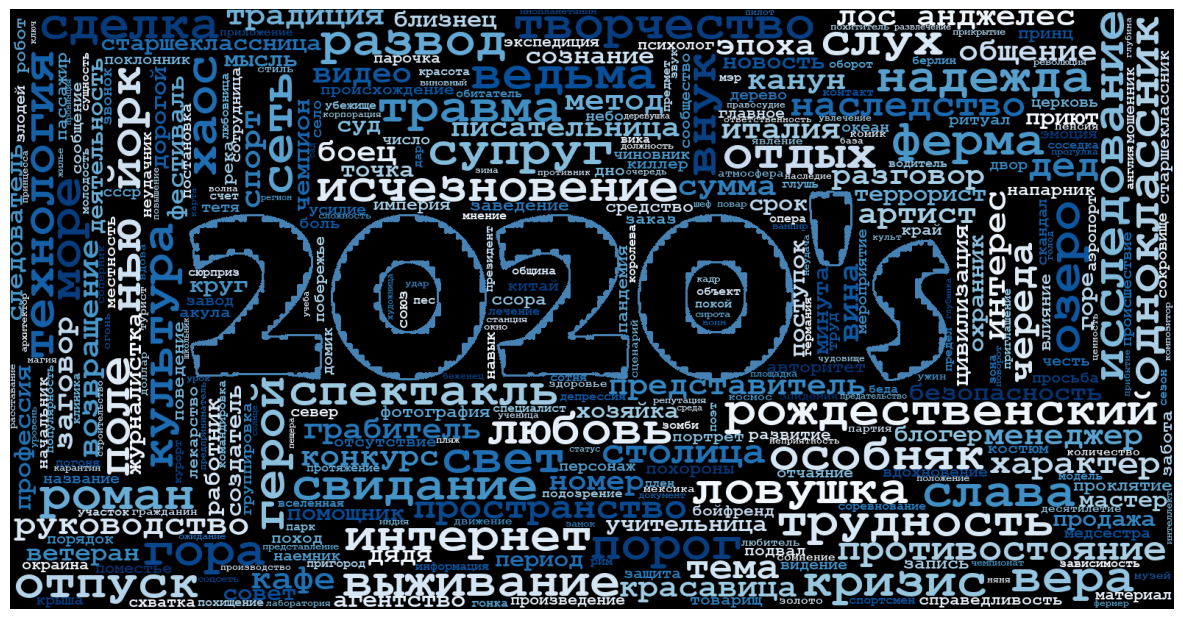

In [327]:
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("2020's nouns WC.jpg")
plt.show()

### А теперь черёд нулевых:

In [352]:
# маска:
image_00 = np.array(Image.open("2000's.jpg"))

In [354]:
wc_00 = WordCloud(max_words=1000, prefer_horizontal=.7, colormap='spring_r', min_font_size=11, max_font_size=70,
               font_path='Courbd 0.ttf', background_color='Black',  width=7680, height=4320, margin=2, 
               mask=image_00, font_step=1, relative_scaling=0, contour_width=3, contour_color='pink').generate(nouns_from_descriptions_1)

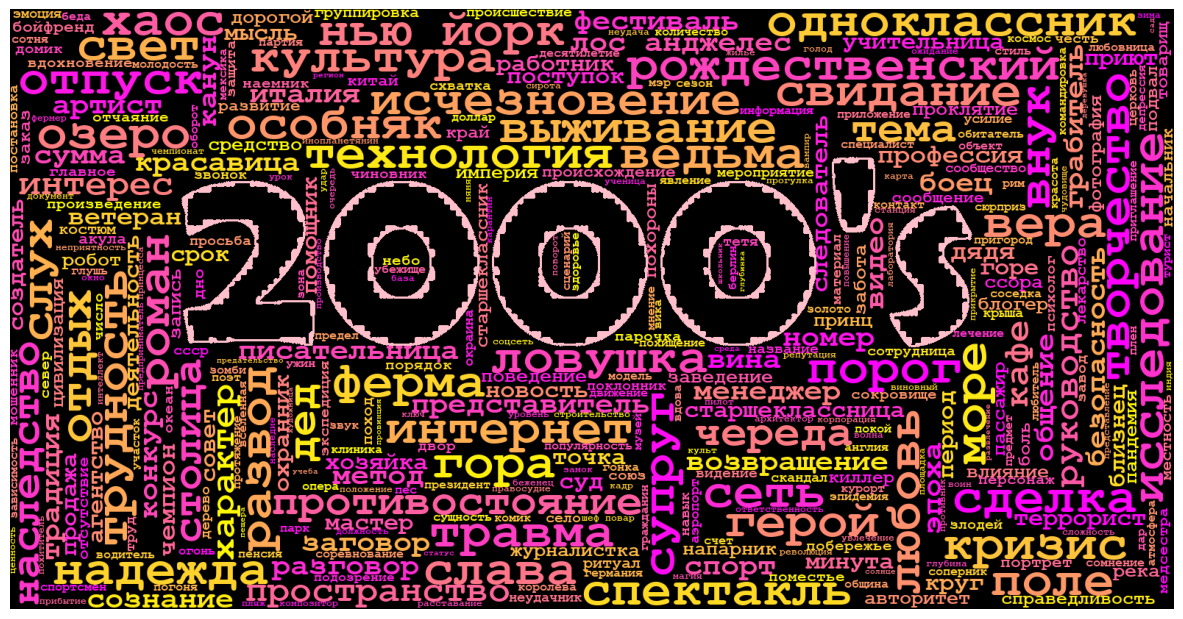

In [358]:
plt.figure(figsize=(12, 6))
plt.imshow(wc_00)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("2000's nouns WC.jpg")
plt.show()

### Соберём существительные в датафрейм для удобства сравнения

In [283]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
stuff += names

In [143]:
def clean_normalized_text(normalized_descriptions_df):
    clean_texts = ' '.join([token for token in normalized_descriptions_df.split() if token not in stuff])
    return(clean_texts)

In [151]:
descriptions_1['Нормализованное описание'] = descriptions_1['Нормализованное описание'].apply(clean_normalized_text)
descriptions_2['Нормализованное описание'] = descriptions_2['Нормализованное описание'].apply(clean_normalized_text)
descriptions_1.head()

,Описание фильма,Нормализованное описание,Только существительные
0,Грузовики лос-анджелесской инкассаторской комп...,грузовик лос-анджелесский инкассаторский forti...,грузовик охранник британец патрик хилл эйч мин...
1,"Гриша, бывший мажор, побывавший холопом и став...",гриша мажор побывать холоп чутко реагировать н...,гриша мажор холоп несправедливость беспредел м...
2,"Если ты идешь на рыбалку — будь готов к тому, ...",рыбалка — вытягивать рыба волшебный щука твой ...,рыбалка рыба щука емеля ветер анфиса щука шкур...
3,"Афганистан, март 2018 года. Во время спецопера...",афганистан март 2018 спецоперация талиб сержан...,афганистан март спецоперация талиб сержант кин...
4,История о путешествии взрослого героя к своему...,батя суровый мужик заря девяностый,батя мужик заря


In [188]:
descriptions_1['Только существительные'] = descriptions_1['Нормализованное описание'].apply(filter_nouns)
descriptions_2['Только существительные'] = descriptions_2['Нормализованное описание'].apply(filter_nouns)
descriptions_1.head()

,Описание фильма,Нормализованное описание,Только существительные
0,Грузовики лос-анджелесской инкассаторской комп...,грузовик лос-анджелесский инкассаторский forti...,грузовик охранник британец патрик хилл эйч мин...
1,"Гриша, бывший мажор, побывавший холопом и став...",гриша мажор побывать холоп чутко реагировать н...,гриша мажор холоп несправедливость беспредел м...
2,"Если ты идешь на рыбалку — будь готов к тому, ...",рыбалка — вытягивать рыба волшебный щука твой ...,рыбалка рыба щука емеля ветер анфиса щука шкур...
3,"Афганистан, март 2018 года. Во время спецопера...",афганистан март 2018 спецоперация талиб сержан...,афганистан март спецоперация талиб сержант кин...
4,История о путешествии взрослого героя к своему...,батя суровый мужик заря девяностый,батя мужик заря


In [198]:
descriptions_1.to_excel('Descriptions_1+nouns.xlsx')
descriptions_2.to_excel('Descriptions_2+nouns.xlsx')

In [189]:
descriptions_1['Только существительные'] = descriptions_1['Только существительные'].str.replace(r'нью йорк', 'нью-йорк', regex=True)
descriptions_1['Только существительные'] = descriptions_1['Только существительные'].str.replace(r'лос анджелес', 'лос-анджелес', regex=True)

In [247]:
key_nouns_df_1 = create_keywords_df(descriptions_1['Только существительные'])
key_nouns_df_2 = create_keywords_df(descriptions_2['Только существительные'])
key_nouns_df_2.head()

,Ключевое слово,Суммарный tf-idf
0,нью-йорк,44.512369
1,красавица,41.315168
2,мафия,36.008846
3,подружка,33.790657
4,доллар,30.512913


In [249]:
key_nouns_df = pd.merge(key_nouns_df_1, key_nouns_df_2, right_index = True, left_index = True, how='outer')
key_nouns_df.columns = ["Ключевое существительное '20", "Суммарный tf-idf", "Ключевое существительное '00", "Суммарный tf-idf"]
key_nouns_df.to_excel('Specific noun keywords.xlsx')
key_nouns_df[:30]

,Ключевое существительное '20,Суммарный tf-idf,Ключевое существительное '00,Суммарный tf-idf
0,нью-йорк,36.788956,нью-йорк,44.512369
1,рождественский,29.566714,красавица,41.315168
2,супруг,28.806575,мафия,36.008846
3,развод,27.157525,подружка,33.790657
4,ферма,26.764715,доллар,30.512913
5,травма,26.573692,лос-анджелес,29.460898
6,выживание,26.145852,террорист,28.301848
7,трудность,25.863340,любовница,28.281222
8,ловушка,25.043054,комедия,27.196411
9,отпуск,24.971354,проститутка,26.342802
